# Lab 2: Kernel regularized least-squares and early stopping

## Exercises:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import all the functions needed for this lab
from utils import *

### 0. Data loading and visualization

1. Load the 2 moons dataset using the `two_moons` function defined in `utils.py`. Since this dataset is 2D you can plot it using matplotlib with the following sample code:

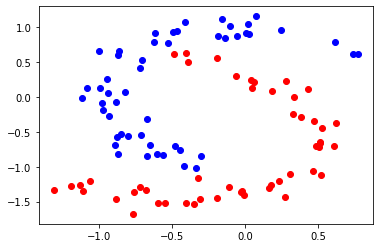

In [28]:
Xtr, Ytr, Xte, Yte = two_moons(pflip=0)
fig, ax = plt.subplots()
ax.scatter(Xtr[Ytr == +1, 0], Xtr[Ytr == +1, 1], color='r')
ax.scatter(Xtr[Ytr == -1, 0], Xtr[Ytr == -1, 1], color='b')

2. Explore the effect of the noise on the dataset: load the data again flipping some of the labels (change the `pflip` argument of the `two_moons` function). Check whether you can see the flipped labels in the plots of the data.

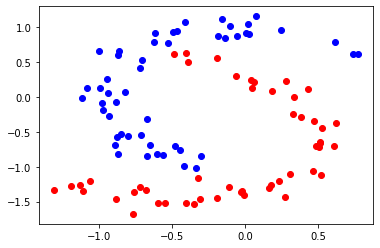

In [29]:
#TODO
Xtr, Ytr, Xte, Yte = two_moons(pflip=0)
fig, ax = plt.subplots()
ax.scatter(Xtr[Ytr == +1, 0], Xtr[Ytr == +1, 1], color='r')
ax.scatter(Xtr[Ytr == -1, 0], Xtr[Ytr == -1, 1], color='b')

3. What kind of effect do you expect on classification performance if you increase the label noise?

In [30]:
#TODO
#1. Basically when you increase label noise the classification problem is going to become much more harder. And that
# Mean that the classifier is going to work extra hard to pick out the hard points to classify. 
#2. Classifier performance is going to decrease in this case as well. Where you you have had say 98% the performance
#might drop to say 70% or less due the hard points to classify in the dataset. 

### 1. KRLS

Fix the amount of label noise to 10%.

1. Use the Gaussian kernel. Fix some values for the penalty, and for the length-scale. Fit a KRLS model to the training data, and calculate the classification error on the training and test data.

    **Hint:** You will have to use the `train_krls` function for training, `linear_predict` function to compute test predictions and `c_err` to calculate the error. Check the doc-strings at the top of the functions defined in this notebook for help on how to use them.
    Note that you can replace `Xte` with `Xtr` in `linear_predict` to compute predictions on the training data and then use `c_err` to compute the training error.

In [46]:
c = train_krls(Xtr, Ytr, lam=0.3, kernel='gaussian', kernel_args=2)
y =  linear_predict(c, Xtr, Xte, kernel='gaussian', kernel_args=2)
y


array([-0.14246515, -0.26439922, -0.1753018 ,  0.20285727,  0.1306169 ,
       -0.05515743, -0.25950264, -0.00798148, -0.16917356,  0.0788075 ,
       -0.06182302, -0.05024768, -0.12242145,  0.07032929, -0.11217879,
        0.09716212, -0.14853194,  0.14717182, -0.07969315, -0.18505203,
        0.15481164, -0.15366713, -0.17203358, -0.20509579, -0.24571644,
       -0.22738038, -0.11802535,  0.16999287, -0.10001743,  0.14661497,
        0.05601036, -0.19104567, -0.20682226, -0.14823941, -0.26521563,
        0.14152066, -0.11671438, -0.17661603, -0.10176843, -0.23985872,
       -0.05795721, -0.23809123, -0.17460922, -0.15676694, -0.24016191,
       -0.25839046, -0.09682959, -0.23484458, -0.22842181, -0.22416109,
       -0.04514107,  0.07534605, -0.21778341, -0.16418018, -0.20985659,
       -0.24161483, -0.26542972,  0.09714778,  0.14656155, -0.25887873,
       -0.07785567, -0.12815634, -0.07472912, -0.05948038, -0.18533879,
       -0.09556989, -0.25242992, -0.14110094, -0.0856106 , -0.23

2. Fix some value for the kernel length-scale. Explore the effect of regularization on classification performance: use the `plot_sep_func` function to visualize how the boundary between the class-labels changes as the regularization changes.

In [1]:
#TODO

3. Fix some value for the regularization parameter. Explore the effect of changing the kernel length-scale: use the `plot_sep_func` function to visualize how the boundary between the class-labels changes.

In [11]:
#TODO

4. **Plot how the training and test errors change versus the amount of regularization with kernel length-scale fixed to 0.5**, and comment on your findings.

In [37]:
reg_pars = [10, 7, 5, 2, 1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
            0.01, 0.005 , 0.002 , 0.001 ,0.0005, 0.0002 , 0.0001 ,
            0.00001 , 0.000001]

In [15]:
#TODO

5. Repeat the previous step with 5%, 20% and 50% of flipped labels. Explain the behavior of test and training errors.

In [16]:
#TODO

6. Fix `fplip=10`. Using the Gaussian and the Polynomial kernel, use **cross-validation** as in the previous lab to find the best values of
 - the kernel parameter (length-scale for the Gaussian kernel, exponent for the polynomial kernel)
 - the amount of regularization
 
     Plot the decision boundaries.

In [17]:
#TODO

### 2. Kernel Least Squares with Early Stopping.

1. Use the Gaussian kernel. Fix some values for the number of iterations and the length-scale. Fit an iterative KLS model to the training data, calculating classification error on the test data.

2. Fix some value for the kernel length-scale (use the same value as in the previous exercise). Explore the effect of the number of iterations on classifiation performance using the `plot_sep_func`. Comment on how the boundary changes as the number of iterations changes.

In [20]:
#TODO

3. **Repeat step 1.4 using the number of iterations**, and comment on differences/similarities to KRLS (previous exercise).

In [3]:
n_iter = [1, 10, 25, 50, 75, 100, 150, 200, 500, 750, 1000, 2000, 3000]

In [22]:
#TODO

### 3. (bonus) Multi-path KRLS

At the heart of the KRLS algorithm is the following problem:

$$
c = (K + \lambda I_{n\times n})^{-1} y
$$

Solving the problem for a single value of $\lambda$ takes $O(n^3)$ operations if $K$ is of size $n\times n$. In this lab we had to solve the linear system above for several values of $\lambda$.

Do we have to pay $O(n^3)$ for each $\lambda$? Given multiple values for $\lambda$, is there a faster way to solve the problem above once we have solved it for the first value of $\lambda$?
**Hint:** any symmetric matrix $S$ has an eigenvalue decomposition as $U\Lambda U^\top$.

In [1]:
#TODO